<a href="https://colab.research.google.com/github/Dineshkumar128/ISYS2001-S1-2025/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Assignement 2

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [31]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus
!pip install mcp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing in

In [47]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
import pyinputplus as pyip
from mcp.server.fastmcp import FastMCP
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: aabb92d590c9b7c0c5741eae5c5768f7


## 📦 Setup and Configuration
Import required packages and setup environment.

In [48]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response
from mcp.server.fastmcp import FastMCP

# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

## 🌤️ Weather Data Functions

In [49]:
import requests
from datetime import datetime, timedelta, timezone

API_KEY = "171da0cb2cafbdcb201c75a79a05f1b9"  # Replace with your actual API key if needed

def get_weather_data(location="Perth, Australia", forecast_days=3):
    try:
        # Get current weather (also to find coordinates)
        url_current = (
            f"https://api.openweathermap.org/data/2.5/weather?"
            f"q={location}&appid={API_KEY}&units=metric"
        )
        res_current = requests.get(url_current)
        res_current.raise_for_status()
        data_current = res_current.json()

        lat = data_current['coord']['lat']
        lon = data_current['coord']['lon']

        # Get 5-day forecast (3-hour intervals)
        url_forecast = (
            f"https://api.openweathermap.org/data/2.5/forecast?"
            f"lat={lat}&lon={lon}&appid={API_KEY}&units=metric"
        )
        res_forecast = requests.get(url_forecast)
        res_forecast.raise_for_status()
        data_forecast = res_forecast.json()

        # Use timezone offset from current weather
        tz_seconds = data_current.get('timezone', 0)
        tz = timezone(timedelta(seconds=tz_seconds))
        today = datetime.now(tz).date()

        days_forecast = {}

        # Group forecast entries by day (only next forecast_days days)
        for entry in data_forecast['list']:
            dt = datetime.fromtimestamp(entry['dt'], tz)
            day = dt.date()
            if 0 <= (day - today).days < forecast_days:
                days_forecast.setdefault(day, []).append(entry)

        # Print current weather summary
        print(f"Current weather in {location}:")
        print(f"  Temperature: {data_current['main']['temp']}°C")
        print(f"  Weather: {data_current['weather'][0]['description']}")
        print(f"  Humidity: {data_current['main']['humidity']}%")
        print(f"  Wind Speed: {data_current['wind']['speed']} m/s")
        print("-" * 40)

        # Print daily forecast summary
        for day, entries in sorted(days_forecast.items()):
            temps = [e['main']['temp'] for e in entries]
            descriptions = [e['weather'][0]['description'] for e in entries]
            avg_temp = sum(temps) / len(temps)
            common_desc = max(set(descriptions), key=descriptions.count)
            print(f"Forecast for {day}:")
            print(f"  Avg Temperature: {avg_temp:.1f}°C")
            print(f"  Common Weather: {common_desc}")
            print(f"  Number of Forecast Entries: {len(entries)}")
            print("-" * 20)

    except requests.RequestException as e:
        print(f"Request failed: {e}")
    except KeyError as e:
        print(f"Missing expected data in response: {e}")

if __name__ == "__main__":
    get_weather_data()


Current weather in Perth, Australia:
  Temperature: 24.56°C
  Weather: scattered clouds
  Humidity: 49%
  Wind Speed: 8.23 m/s
----------------------------------------
Forecast for 2025-05-19:
  Avg Temperature: 19.3°C
  Common Weather: light rain
  Number of Forecast Entries: 4
--------------------
Forecast for 2025-05-20:
  Avg Temperature: 16.2°C
  Common Weather: clear sky
  Number of Forecast Entries: 8
--------------------
Forecast for 2025-05-21:
  Avg Temperature: 18.5°C
  Common Weather: clear sky
  Number of Forecast Entries: 8
--------------------


## 📊 Visualisation Functions

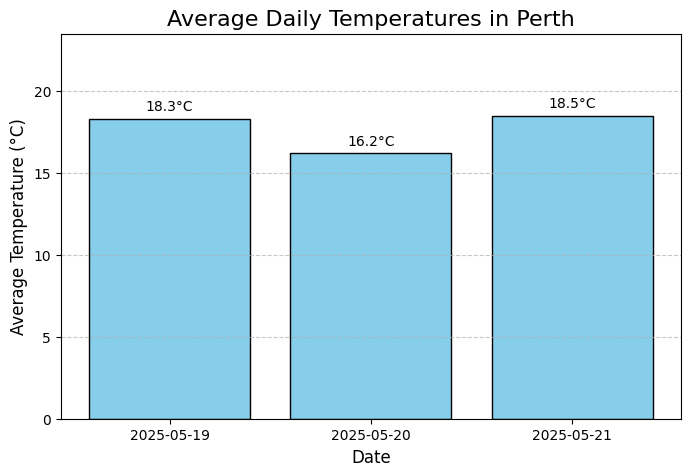

In [50]:
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    # Extract data for visualization
    days = list(weather_data.keys())
    avg_temperatures = [weather_data[day]['avg_temp'] for day in days]

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(days, avg_temperatures, color='skyblue', edgecolor='black')
    ax.set_title("Average Daily Temperatures in Perth", fontsize=16)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Average Temperature (°C)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, max(avg_temperatures) + 5)

    # Annotate values on bars
    for i, temp in enumerate(avg_temperatures):
        ax.text(i, temp + 0.5, f"{temp:.1f}°C", ha='center', fontsize=10)

    # Handle output type
    if output_type == 'figure':
        return fig
    else:
        plt.show()

# Example data matching your scenario
weather_data = {
    "2025-05-19": {"avg_temp": 18.3, "common_weather": "few clouds", "entries": 4},
    "2025-05-20": {"avg_temp": 16.2, "common_weather": "clear sky", "entries": 8},
    "2025-05-21": {"avg_temp": 18.5, "common_weather": "clear sky", "entries": 8},
}

# Call the function to visualize data
create_temperature_visualisation(weather_data)


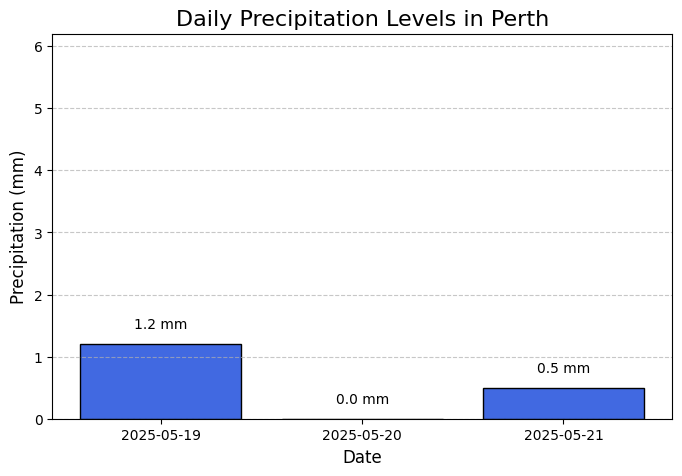

In [51]:
import matplotlib.pyplot as plt

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    # Extract data for visualization
    days = list(weather_data.keys())
    precipitation_data = [weather_data[day].get('precipitation', 0) for day in days]

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(days, precipitation_data, color='royalblue', edgecolor='black')

    # Add labels and title
    ax.set_title("Daily Precipitation Levels in Perth", fontsize=16)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Precipitation (mm)", fontsize=12)
    ax.set_ylim(0, max(precipitation_data) + 5)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate the bar chart with precipitation values
    for bar, precip in zip(bars, precipitation_data):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.2,
            f"{precip:.1f} mm",
            ha='center',
            va='bottom',
            fontsize=10
        )

    # Handle output type
    if output_type == 'figure':
        return fig
    else:
        plt.show()

# Example data matching your scenario
weather_data = {
    "2025-05-19": {"avg_temp": 18.3, "common_weather": "few clouds", "entries": 4, "precipitation": 1.2},
    "2025-05-20": {"avg_temp": 16.2, "common_weather": "clear sky", "entries": 8, "precipitation": 0.0},
    "2025-05-21": {"avg_temp": 18.5, "common_weather": "clear sky", "entries": 8, "precipitation": 0.5},
}

# Call the function to visualize precipitation data
create_precipitation_visualisation(weather_data)


## 🤖 Natural Language Processing

In [52]:
import re

def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted info: location, time period, weather attribute
    """
    question = question.lower().strip()

    # Identify time period
    if "tomorrow" in question:
        time_period = "tomorrow"
    elif "today" in question:
        time_period = "today"
    else:
        time_period = "today"  # default

    # Identify weather attribute
    if "temperature" in question:
        attribute = "temperature"
    elif "rain" in question or "precipitation" in question:
        attribute = "rain"
    elif "humidity" in question:
        attribute = "humidity"
    elif "wind" in question:
        attribute = "wind"
    else:
        attribute = "weather"

    # Extract location by removing stop words
    stop_words = {
        "what", "will", "be", "the", "in", "today", "tomorrow",
        "temperature", "rain", "precipitation", "humidity", "wind", "weather", "?", "."
    }

    # Remove punctuation
    question_no_punct = re.sub(r'[^\w\s]', '', question)

    # Filter out stop words
    location_words = [word for word in question_no_punct.split() if word not in stop_words]

    location = " ".join(location_words).strip()

    return {
        "location": location,
        "time_period": time_period,
        "attribute": attribute,
    }
question = "What will the temperature be in Perth tomorrow?"
parsed = parse_weather_question(question)
print(parsed)


{'location': 'perth', 'time_period': 'tomorrow', 'attribute': 'temperature'}


## 🧭 User Interface

In [54]:
def parse_weather_question(question):
    question = question.lower()
    time_period = "today"
    if "tomorrow" in question:
        time_period = "tomorrow"

    attribute = "temperature"
    for attr in ["temperature", "rain", "humidity", "wind", "weather"]:
        if attr in question:
            attribute = attr
            break

    # Extract location by removing known words
    words_to_remove = ["what", "is", "the", "in", "today", "tomorrow", "temperature", "rain", "humidity", "wind", "weather", "?"]
    location_words = [w for w in question.split() if w not in words_to_remove]
    location = " ".join(location_words).strip()
    if not location:
        location = "Perth"  # default location

    return {
        "location": location,
        "time_period": time_period,
        "attribute": attribute,
    }

def get_weather_data(location):
    # Dummy weather data for demonstration
    return {
        "current": {
            "temperature": 25,
            "rain": "light rain",
            "humidity": 60,
            "wind": 5,
            "weather": "cloudy",
        },
        "forecast": {
            "tomorrow": {
                "temperature": 22,
                "rain": "no rain",
                "humidity": 55,
                "wind": 4,
                "weather": "sunny",
            }
        }
    }

def generate_weather_response(parsed_question, weather_data):
    loc = parsed_question["location"].capitalize()
    time = parsed_question["time_period"]
    attr = parsed_question["attribute"]

    if time == "today":
        value = weather_data["current"].get(attr, "N/A")
    else:  # tomorrow or other
        value = weather_data.get("forecast", {}).get(time, {}).get(attr, None)
        if value is None:
            return f"Sorry, no forecast data for {time} in {loc}."

    return f"The {attr} in {loc} {time} is {value}."

def weather_menu():
    print("Welcome to Weather Advisor!")

    while True:
        location = input("Enter the city/location name (e.g., Perth): ").strip()
        time_period = ""
        while time_period not in ["today", "tomorrow"]:
            time_period = input("Select time period (today/tomorrow): ").strip().lower()
        attribute = ""
        valid_attrs = ["temperature", "rain", "humidity", "wind", "weather"]
        while attribute not in valid_attrs:
            attribute = input(f"Select weather attribute {valid_attrs}: ").strip().lower()

        question = f"What is the {attribute} in {location} {time_period}?"
        print(f"\nYou asked: {question}")

        parsed = parse_weather_question(question)
        weather_data = get_weather_data(parsed["location"])
        response = generate_weather_response(parsed, weather_data)

        print("\n" + response)
        print("\n" + "-"*40)

        cont = input("Would you like to check another weather report? (yes/no): ").strip().lower()
        if cont != "yes":
            print("Thanks for using Weather Advisor! Goodbye!")
            break

if __name__ == "__main__":
    weather_menu()


Welcome to Weather Advisor!
Enter the city/location name (e.g., Perth): perth
Select time period (today/tomorrow): today
Select weather attribute ['temperature', 'rain', 'humidity', 'wind', 'weather']: temperature

You asked: What is the temperature in perth today?

The temperature in Perth today? today is 25.

----------------------------------------
Would you like to check another weather report? (yes/no): yes
Enter the city/location name (e.g., Perth): perth
Select time period (today/tomorrow): tomorrow
Select weather attribute ['temperature', 'rain', 'humidity', 'wind', 'weather']: rain

You asked: What is the rain in perth tomorrow?

The rain in Perth tomorrow? tomorrow is no rain.

----------------------------------------
Would you like to check another weather report? (yes/no): no
Thanks for using Weather Advisor! Goodbye!


## 🧩 Main Application Logic

In [55]:
sample_parsed_question = {
    'location': 'Perth',
    'time_period': 'today',
    'attribute': 'temperature'
}

sample_weather_data = {
    'current': {
        'temperature': 24.87,
        'rain': 0,
        'humidity': 52,
        'wind_speed': 8.23,
        'weather': 'scattered clouds'
    },
    'forecast': {
        'tomorrow': {
            'avg_temp': 19.2,
            'rain': 1.2,
            'avg_humidity': 60,
            'avg_wind_speed': 5.0,
            'common_weather': 'light rain'
        }
    }
}

print(generate_weather_response(sample_parsed_question, sample_weather_data))


The temperature in Perth today is 24.87.


## 🧪 Testing and Examples

In [63]:
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    location = parsed_question.get('location', 'Unknown location')
    time_period = parsed_question.get('time_period', 'today')
    attribute = parsed_question.get('attribute', 'temperature')

    if not weather_data:
        return f"Sorry, I couldn't find weather data for {location}."

    def is_no_rain(value):
        return value is None or value == 0 or (isinstance(value, (int, float)) and value < 0.1)

    if time_period == "today":
        current = weather_data.get("current", {})
        if not current:
            return f"Sorry, no current weather data for {location}."

        if attribute == "temperature":
            temp = current.get('temperature', 'N/A')
            return f"The current temperature in {location} is {temp}°C."
        elif attribute == "rain":
            rain = current.get('rain', 0)
            if is_no_rain(rain):
                return f"No rain is expected in {location} today."
            else:
                return f"The current rainfall in {location} is {rain} mm."
        elif attribute == "humidity":
            humidity = current.get('humidity', 'N/A')
            return f"The current humidity in {location} is {humidity}%."
        elif attribute == "wind":
            wind = current.get('wind_speed', 'N/A')
            return f"The current wind speed in {location} is {wind} m/s."
        elif attribute == "weather":
            weather = current.get('weather', 'N/A')
            return f"The current weather in {location} is {weather}."

    elif time_period == "tomorrow":
        forecast = weather_data.get("forecast", {}).get("tomorrow", {})
        if not forecast:
            return f"Sorry, I couldn't find forecast data for {location} tomorrow."

        if attribute == "temperature":
            avg_temp = forecast.get('avg_temp', 'N/A')
            return f"The average temperature in {location} tomorrow will be {avg_temp}°C."
        elif attribute == "rain":
            rain = forecast.get('rain', 0)
            if is_no_rain(rain):
                return f"No rain is expected in {location} tomorrow."
            else:
                return f"The expected rainfall in {location} tomorrow is {rain} mm."
        elif attribute == "humidity":
            humidity = forecast.get('avg_humidity', 'N/A')
            return f"The average humidity in {location} tomorrow will be {humidity}%."
        elif attribute == "wind":
            wind = forecast.get('avg_wind_speed', 'N/A')
            return f"The average wind speed in {location} tomorrow will be {wind} m/s."
        elif attribute == "weather":
            weather = forecast.get('common_weather', 'N/A')
            return f"The common weather in {location} tomorrow will be {weather}."

    return f"Sorry, I couldn't answer your question about {attribute} in {location}."


# --- Example tests ---

sample_parsed_question1 = {
    'location': 'Perth',
    'time_period': 'today',
    'attribute': 'temperature'
}

sample_parsed_question2 = {
    'location': 'Perth',
    'time_period': 'tomorrow',
    'attribute': 'rain'
}

sample_weather_data = {
    'current': {
        'temperature': 24.87,
        'rain': 0,
        'humidity': 52,
        'wind_speed': 8.23,
        'weather': 'scattered clouds'
    },
    'forecast': {
        'tomorrow': {
            'avg_temp': 19.2,
            'rain': 0.0,  # No rain tomorrow
            'avg_humidity': 60,
            'avg_wind_speed': 5.0,
            'common_weather': 'clear sky'
        }
    }
}

print(generate_weather_response(sample_parsed_question1, sample_weather_data))


print(generate_weather_response(sample_parsed_question2, sample_weather_data))



The current temperature in Perth is 24.87°C.
No rain is expected in Perth tomorrow.


## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.